In [231]:
# all modules necessary for this nb
import os
import sys
import pickle
from collections import Counter

import numpy as np
import pylab as pl
import scipy.stats as sstats
import pandas as pd

from scipy.io import savemat
import random

# setting parameters for default matplotlib plots
%matplotlib inline

In [232]:
pl.style.use('fabiostyle')

In [233]:
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [234]:
NOTEBOOK_NAME = 'breath_glm'

In [235]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'r2_vals.mat', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [236]:
#post data only
vhpc_animals = 'c18m9','vNAc7','94', '96', '100', '98', '99', '104'
vhpc_post_animals = '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'

dhpc_animals = 'dhpc40','dhpc37', 'dhpc39', 'dNAc3','dNAc4'
dhpc_post_animals = 'dhpc37', 'dhpc39', 'dhpc40', 'dNAc3', 'dNAc4'


all_animals = vhpc_animals + dhpc_animals
print all_animals

('c18m9', 'vNAc7', '94', '96', '100', '98', '99', '104', 'dhpc40', 'dhpc37', 'dhpc39', 'dNAc3', 'dNAc4')


In [237]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Single animal

#   so I need to take for each cell a matrix of every trial animal x cell_count x trial x time_bin (baseline, odor 0-1, 1-2, 3-4)

#   so I need to take for each cell a matrix of every trial animal x behavior_var trial x time_bin (baseline, odor 0-1, 1-2, 3-4)
# these are lick_count, resp_rate_avg, trial type, odor ID

In [238]:
sessions = ['post']
bins = ['baseline','odor1','odor2','trace']
delta_t0 = 1
t_start0 = -5  # sec
t_stop0 = 11  # sec

In [239]:
cell_count_vhpc

282

In [240]:
cell_count_vhpc = 0
cell_count_dhpc = 0

for animal in vhpc_animals:

    for var in 'time_ax', 'traces', 'events', 'cycles','is_STIM1t', 'is_STIM2t', 'is_STIM3t','is_STIM4t','rewards','licks','CYCLE_START','CS_DURATION','DELAY','US_START', 'STIM1_ons','STIM2_ons','STIM3_ons','STIM4_ons':
        exec("%s = ut.load_variable('%s', '../%s/post/notebooks/autorestore/preprocessing')"%(var, var, animal))
    patterns_evs = np.r_[[ut.extract_activity(time_ax,events, cycles, CYCLE_START,1, 2, offset=t_start0)]]
    
        
    cell_count_vhpc = cell_count_vhpc + len(patterns_evs[0][0])

for animal in dhpc_animals:

    for var in 'time_ax', 'traces', 'events', 'cycles','is_STIM1t', 'is_STIM2t', 'is_STIM3t','is_STIM4t','rewards','licks','CYCLE_START','CS_DURATION','DELAY','US_START', 'STIM1_ons','STIM2_ons','STIM3_ons','STIM4_ons':
        exec("%s = ut.load_variable('%s', '../%s/post/notebooks/autorestore/preprocessing')"%(var, var, animal))
    patterns_evs = np.r_[[ut.extract_activity(time_ax,events, cycles, CYCLE_START,1, 2, offset=t_start0)]]
    
        
    cell_count_dhpc = cell_count_dhpc + len(patterns_evs[0][0])

In [241]:
for bi in bins:
    exec("ev_dhpc_%s = np.zeros(cell_count_dhpc*120)"%(bi))
    exec("var_dhpc_%s = np.zeros((cell_count_dhpc*120,4))"%(bi))

    exec("ev_vhpc_%s = np.zeros(cell_count_vhpc*120)"%(bi))
    exec("var_vhpc_%s = np.zeros((cell_count_vhpc*120,4))"%(bi))

In [242]:
print(len(time_ax))
print(len(resp_rate))

7740
7740


In [253]:
def extract_resp_rate(time_ax, resp_rate, cycles, CYCLE_START, STIM_START, STIM_END):
    n_tim = len(cycles)
    patterns = np.zeros(n_tim)
    for i, (s, e) in enumerate(cycles):
        time_filter = ((time_ax>=(s-CYCLE_START+STIM_START)) * (time_ax<(s-CYCLE_START+STIM_END)))
        patterns[i] = resp_rate[time_filter].mean(0)
    #patterns = patterns.reshape(len(cycles), -1)
    # patterns = patterns[:, which_cells]
    
    return patterns

In [259]:
arr_temp = patterns_evs_baseline[0]
print(arr_temp)
random.shuffle(arr_temp)
ev_vhpc_baseline[0:120] = arr_temp
print(ev_vhpc_baseline[0:119])

[ 0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.49625   0.57955   0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.730175  0.        0.        0.        0.        0.        0.        1.7602
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.591     0.98475   0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  3.073175  0.        0.        0.        0.        0.        0.645     0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.518875  0.        0.        0.        0.87415   0.
  0.        0.        0.        0.        0.        0.52885   0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  1.204525  0.       

In [262]:
e = list(zip(a, b,c,d))

random.shuffle(e)

a, b, c, d = zip(*e)

(2, 3, 4, 1)
(6, 7, 8, 5)
(10, 11, 12, 9)
(14, 15, 16, 13)


In [263]:
run_cell_tot = 0

for animal in vhpc_animals:

    for var in 'time_ax', 'traces', 'events', 'cycles','is_STIM1t', 'is_STIM2t', 'is_STIM3t','is_STIM4t','rewards','licks','CYCLE_START','CS_DURATION','DELAY','US_START', 'STIM1_ons','STIM2_ons','STIM3_ons','STIM4_ons':
        exec("%s = ut.load_variable('%s', '../%s/post/notebooks/autorestore/preprocessing')"%(var, var, animal))
    for var in 'resp_rate', 'time_ax_val_n', 'csp_ons', 'csm_ons' :
        exec("%s = ut.load_variable('%s', '../%s/post/notebooks/autorestore/breathing')"%(var, var, animal))
    
#Cycle00001_VoltageRecording_001.csv
   
#1sec time bins


    od_labels = ((np.r_[is_STIM1t]*1)+(np.r_[is_STIM2t]*2)+(np.r_[is_STIM3t]*3)+(np.r_[is_STIM4t]*4))
    out_labels = ((np.r_[is_STIM1t]*1)+(np.r_[is_STIM2t]*1)+(np.r_[is_STIM3t]*2)+(np.r_[is_STIM4t]*2))

    for sess in sessions:
        for bi in bins:
            if bi == 'baseline':
                exec("patterns_evs_%s = np.r_[[ut.extract_activity(time_ax,events, cycles,\
                                           CYCLE_START,1, 2, offset=t_start0)]]"%(bi))
                exec("patterns_evs_%s = patterns_evs_%s.reshape(len(patterns_evs_%s[0][0]),-1)"%(bi,bi,bi))
                exec("licks_%s = np.r_[[ut.compute_licks_during(licks, cycles,start=1, end=2)]]"%(bi))
                exec("resps_%s = extract_resp_rate(time_ax,resp_rate,cycles,CYCLE_START, 1,2)"%(bi))

                
                for i in range(len(patterns_evs_baseline)):
                    if i == 0:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120] = a"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,3] = e"%(bi))
                    else:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120] = a"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,3] = e"%(bi))
                
            elif bi == 'odor1':
                exec("patterns_evs_%s = np.r_[[ut.extract_activity(time_ax,events, cycles,\
                                           CYCLE_START,0, 1)]]"%(bi))
                exec("patterns_evs_%s = patterns_evs_%s.reshape(len(patterns_evs_%s[0][0]),-1)"%(bi,bi,bi))
                
                exec("licks_%s = np.r_[[ut.compute_licks_during(licks, cycles,start=5, end=6)]]"%(bi))
                exec("resps_%s = extract_resp_rate(time_ax,resp_rate,cycles,CYCLE_START, 5,6)"%(bi))
    
                for i in range(len(patterns_evs_baseline)):
                    if i == 0:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120] = a"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,3] = e"%(bi))
                    else:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120] = a"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,3] = e"%(bi))
                
            elif bi == 'odor2':
                exec("patterns_evs_%s = np.r_[[ut.extract_activity(time_ax,events, cycles,\
                                           CYCLE_START,1, 2)]]"%(bi))
                exec("patterns_evs_%s = patterns_evs_%s.reshape(len(patterns_evs_%s[0][0]),-1)"%(bi,bi,bi))
            
                exec("licks_%s = np.r_[[ut.compute_licks_during(licks, cycles,start=6, end=7)]]"%(bi))
                exec("resps_%s = extract_resp_rate(time_ax,resp_rate,cycles,CYCLE_START, 6,7)"%(bi))
                for i in range(len(patterns_evs_baseline)):
                    if i == 0:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120] = a"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,3] = e"%(bi))
                    else:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120] = a"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,3] = e"%(bi))
                
            else:
                exec("patterns_evs_%s = np.r_[[ut.extract_activity(time_ax,events, cycles,\
                                           CYCLE_START,3, 4)]]"%(bi))
                exec("patterns_evs_%s = patterns_evs_%s.reshape(len(patterns_evs_%s[0][0]),-1)"%(bi,bi,bi))
                
                
                exec("licks_%s = np.r_[[ut.compute_licks_during(licks, cycles,start=8, end=9)]]"%(bi))
                exec("resps_%s = extract_resp_rate(time_ax,resp_rate,cycles,CYCLE_START, 8,9)"%(bi))
                
                for i in range(len(patterns_evs_baseline)):
                    if i == 0:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120] = a"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_vhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,3] = e"%(bi))
                    else:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120] = a"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_vhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,3] = e"%(bi))
                
                
        run_cell_tot = run_cell_tot + len(patterns_evs_baseline)


In [264]:
run_cell_tot = 0

for animal in dhpc_animals:

    for var in 'time_ax', 'traces', 'events', 'cycles','is_STIM1t', 'is_STIM2t', 'is_STIM3t','is_STIM4t','rewards','licks','CYCLE_START','CS_DURATION','DELAY','US_START', 'STIM1_ons','STIM2_ons','STIM3_ons','STIM4_ons':
        exec("%s = ut.load_variable('%s', '../%s/post/notebooks/autorestore/preprocessing')"%(var, var, animal))
    for var in 'resp_rate', 'time_ax_val_n', 'csp_ons', 'csm_ons' :
        exec("%s = ut.load_variable('%s', '../%s/post/notebooks/autorestore/breathing')"%(var, var, animal))
    
#Cycle00001_VoltageRecording_001.csv
   
#1sec time bins


    od_labels = ((np.r_[is_STIM1t]*1)+(np.r_[is_STIM2t]*2)+(np.r_[is_STIM3t]*3)+(np.r_[is_STIM4t]*4))
    out_labels = ((np.r_[is_STIM1t]*1)+(np.r_[is_STIM2t]*1)+(np.r_[is_STIM3t]*2)+(np.r_[is_STIM4t]*2))

    for sess in sessions:
        for bi in bins:
            if bi == 'baseline':
                exec("patterns_evs_%s = np.r_[[ut.extract_activity(time_ax,events, cycles,\
                                           CYCLE_START,1, 2, offset=t_start0)]]"%(bi))
                exec("patterns_evs_%s = patterns_evs_%s.reshape(len(patterns_evs_%s[0][0]),-1)"%(bi,bi,bi))
                exec("licks_%s = np.r_[[ut.compute_licks_during(licks, cycles,start=1, end=2)]]"%(bi))
                exec("resps_%s = extract_resp_rate(time_ax,resp_rate,cycles,CYCLE_START, 1,2)"%(bi))

                
                for i in range(len(patterns_evs_baseline)):
                    if i == 0:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120] = a"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,3] = e"%(bi))
                    else:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120] = a"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,3] = e"%(bi))
                
            elif bi == 'odor1':
                exec("patterns_evs_%s = np.r_[[ut.extract_activity(time_ax,events, cycles,\
                                           CYCLE_START,0, 1)]]"%(bi))
                exec("patterns_evs_%s = patterns_evs_%s.reshape(len(patterns_evs_%s[0][0]),-1)"%(bi,bi,bi))
                
                exec("licks_%s = np.r_[[ut.compute_licks_during(licks, cycles,start=5, end=6)]]"%(bi))
                exec("resps_%s = extract_resp_rate(time_ax,resp_rate,cycles,CYCLE_START, 5,6)"%(bi))
    
                for i in range(len(patterns_evs_baseline)):
                    if i == 0:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120] = a"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,3] = e"%(bi))
                    else:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120] = a"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,3] = e"%(bi))
                
            elif bi == 'odor2':
                exec("patterns_evs_%s = np.r_[[ut.extract_activity(time_ax,events, cycles,\
                                           CYCLE_START,1, 2)]]"%(bi))
                exec("patterns_evs_%s = patterns_evs_%s.reshape(len(patterns_evs_%s[0][0]),-1)"%(bi,bi,bi))
            
                exec("licks_%s = np.r_[[ut.compute_licks_during(licks, cycles,start=6, end=7)]]"%(bi))
                exec("resps_%s = extract_resp_rate(time_ax,resp_rate,cycles,CYCLE_START, 6,7)"%(bi))
                for i in range(len(patterns_evs_baseline)):
                    if i == 0:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120] = a"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,3] = e"%(bi))
                    else:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120] = a"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,3] = e"%(bi))
                
            else:
                exec("patterns_evs_%s = np.r_[[ut.extract_activity(time_ax,events, cycles,\
                                           CYCLE_START,3, 4)]]"%(bi))
                exec("patterns_evs_%s = patterns_evs_%s.reshape(len(patterns_evs_%s[0][0]),-1)"%(bi,bi,bi))
                
                
                exec("licks_%s = np.r_[[ut.compute_licks_during(licks, cycles,start=8, end=9)]]"%(bi))
                exec("resps_%s = extract_resp_rate(time_ax,resp_rate,cycles,CYCLE_START, 8,9)"%(bi))
                
                for i in range(len(patterns_evs_baseline)):
                    if i == 0:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120] = a"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_dhpc_%s[i+run_cell_tot*120:120+run_cell_tot*120,3] = e"%(bi))
                    else:
                        exec("a = patterns_evs_%s[i]"%(bi,))
                        exec("b = licks_%s[0]"%(bi,))
                        exec("c = resps_%s"%(bi,))
                        d = od_labels
                        e = out_labels
                        f = list(zip(a,b,c,d,e))
                        random.shuffle(f)
                        a,b,c,d,e = zip(*f)
                        exec("ev_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120] = a"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,0] = b"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,1] = c"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,2] = d"%(bi))
                        exec("var_dhpc_%s[i*120+run_cell_tot*120:(i+1)*120+run_cell_tot*120,3] = e"%(bi))
                
                
        run_cell_tot = run_cell_tot + len(patterns_evs_baseline)


In [265]:
resps

array([ 3.3281017 ,  4.1844338 ,  1.94255266,  4.36690358,  4.47794254,
        0.9997247 ,  5.34041439,  1.68542292,  1.7934348 ,  2.68110938,
        2.87112166,  4.04822399,  1.31734076,  2.05277792,  2.99296121,
        1.42647075,  1.60477388,  0.73443773,  4.20638233,  3.88157412,
        3.22668082,  2.0066426 ,  4.80314779,  1.16185518,  4.90198764,
        1.78325432,  4.15899831,  1.34925735,  1.99000431,  2.79885854,
        4.30146779,  1.19402202,  3.10829753,  3.41589348,  3.07904772,
        2.7309206 ,  1.53989578,  2.32101606,  5.36466755,  6.52145965,
        2.11609238,  9.40056245,  4.33144072,  3.21662243,  2.07081554,
        0.88895854,  5.14795868,  2.91278514,  3.74008089,  6.37726658,
        3.50115516,  3.59306704,  4.77177042,  3.78498043,  2.76794839,
        5.22685327,  2.23517001,  2.92323539,  5.73773634,  7.39954843,
        3.86555598,  2.88681884,  2.57434456,  1.8168157 ,  1.26240736,
        6.27598219,  4.98438487,  3.54753396,  0.79023632,  5.65

In [266]:
ani_group = ['vhpc','dhpc']
for ani_g in ani_group:
    for sess in sessions:
        for bi in bins:
            exec("x_train_%s_%s,x_test_%s_%s,y_train_%s_%s,y_test_%s_%s = train_test_split(var_%s_%s,ev_%s_%s,test_size=0.2)"%(ani_g,bi,ani_g,bi,ani_g,bi,ani_g,bi,ani_g,bi,ani_g,bi,))

In [267]:
in_out = ['x','y']
tr_te = ['train','test']
for t in tr_te:
    for i in in_out:
        for ani_g in ani_group:
                for bi in bins:
                    exec("%s_%s_%s_%s_dict = {'%s_%s_%s_%s':%s_%s_%s_%s,'label':'exp'}"%(i,t,ani_g,bi,i,t,ani_g,bi,i,t,ani_g,bi,))
                    exec("savemat('%s_%s_%s_%s_dict.mat',%s_%s_%s_%s_dict)"%(i,t,ani_g,bi,i,t,ani_g,bi,))

In [269]:
in_out = ['x','y']
for ani_g in ani_group:
    for bi in bins:
        exec("x_%s_%s_dict = {'var_%s_%s':var_%s_%s,'label':'exp'}"%(ani_g,bi,ani_g,bi,ani_g,bi,))
        exec("savemat('x_%s_%s_dict.mat',x_%s_%s_dict)"%(ani_g,bi,ani_g,bi,))
        exec("y_%s_%s_dict = {'ev_%s_%s':ev_%s_%s,'label':'exp'}"%(ani_g,bi,ani_g,bi,ani_g,bi,))
        exec("savemat('y_%s_%s_dict.mat',y_%s_%s_dict)"%(ani_g,bi,ani_g,bi,))

In [249]:
type(x_test_dhpc_baseline)

numpy.ndarray

In [427]:
from scipy.io import loadmat

r2_vals = loadmat('/home/fabios/data/data/odor_ass_learning_2019/4odor_revision/results/notebooks/r2_vals_n_final.mat')

In [428]:
r2_vals

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Oct 14 16:30:26 2022',
 '__version__': '1.0',
 'dhpc_r2_f_diff_baseline': array([[  1.00000000e+00,   1.30729916e-01,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  3.96079937e-01,   8.76317783e-02,   0.00000000e+00,
           6.69020053e-03,   7.98280420e-03],
        [  3.55386888e-01,   3.86269425e-03,   2.04673561e-02,
           1.42555444e-02,   2.83178894e-02],
        ..., 
        [  7.19004762e-02,   1.86175203e-02,   0.00000000e+00,
           8.77425517e-03,   1.29407151e-02],
        [  1.31324684e-01,   4.29319356e-05,   5.73981966e-04,
           9.57981349e-03,   1.91408724e-03],
        [  3.17990627e-02,   0.00000000e+00,   4.11047259e-03,
           8.20500429e-03,   2.25147339e-02]]),
 'dhpc_r2_f_diff_odor1': array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  1.78632646e-01,   1.5

In [439]:
partz = ['full','licks','resp','odor','outcome']
for ani in ani_group:
    for bi in bins:
        exec('%s_%s=[]'%(ani,bi))
        exec('%s_%s.append(r2_vals["%s_r2_f_diff_%s"])'%(ani,bi,ani,bi))
        exec('%s_%s = [x for x in %s_%s][0]'%(ani,bi,ani,bi))



In [440]:
partz = ['full','licks','resp','odor','outcome']
ani='dhpc'
for bi in bins:
    exec('%s_%s_samp=[]'%(ani,bi))
    exec('%s_%s_samp.append(r2_vals["%s_samp_r2_f_diff_%s"])'%(ani,bi,ani,bi))
    exec('%s_%s_samp = [x for x in %s_%s_samp][0]'%(ani,bi,ani,bi))

MannwhitneyuResult(statistic=1.0, pvalue=0.013789426131302253)

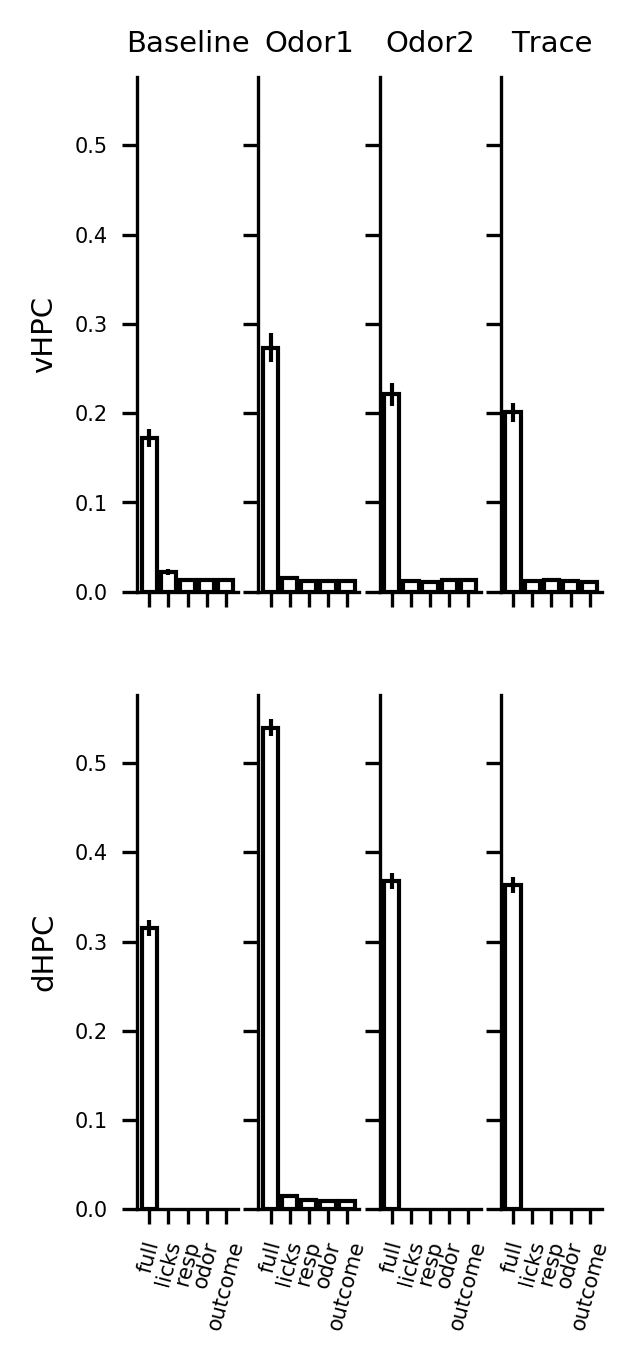

In [431]:
fig, ax = pl.subplots(2, 4, figsize=(2., 5), sharex=True, sharey=True)


a_ax=0
for ani in ani_group:
    b_ax=0
    for bi in bins:
        ax_t=ax[a_ax][b_ax]
        exec("pt.plot_bars(np.r_[%s_%s.T],stderr=True,ax=ax_t)")%(ani,bi)
        b_ax=b_ax+1
    a_ax=a_ax+1
    
ax[0][0].set_title('Baseline')
ax[0][1].set_title('Odor1')
ax[0][2].set_title('Odor2')
ax[0][3].set_title('Trace')
    
ax[0][0].set_ylabel('vHPC')
ax[1][0].set_ylabel('dHPC')
    
for ax_t in ax[-1]:
    ax_t.set_xticks(range(len(partz)))
    ax_t.set_xticklabels(partz, fontsize=5, rotation=75)
    
#ax.set_ylim(-0.5, 1)
#ax.set_xlim(-0.5, 1.5)

#ax.set_xticks(np.arange(2))
#ax.set_xticklabels(['vHPC', 'dHPC'])

#ax.set_ylabel(r'$R^2$')

pvs = []
#pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 1))

stat_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
stat_func(values[0],values[1])

In [447]:
partz = ['full','licks','resp','odor','outcome']
ani='dhpc'
for bi in bins:
    exec('%s_%s=[]'%(ani,bi))
    exec('%s_%s.append(r2_vals["%s_samp_r2_f_diff_%s"])'%(ani,bi,ani,bi))
    exec('%s_%s = [x for x in %s_%s_samp][0]'%(ani,bi,ani,bi))



In [448]:
dhpc_odor1[10:100]

array([], dtype=float64)

MannwhitneyuResult(statistic=1.0, pvalue=0.013789426131302253)

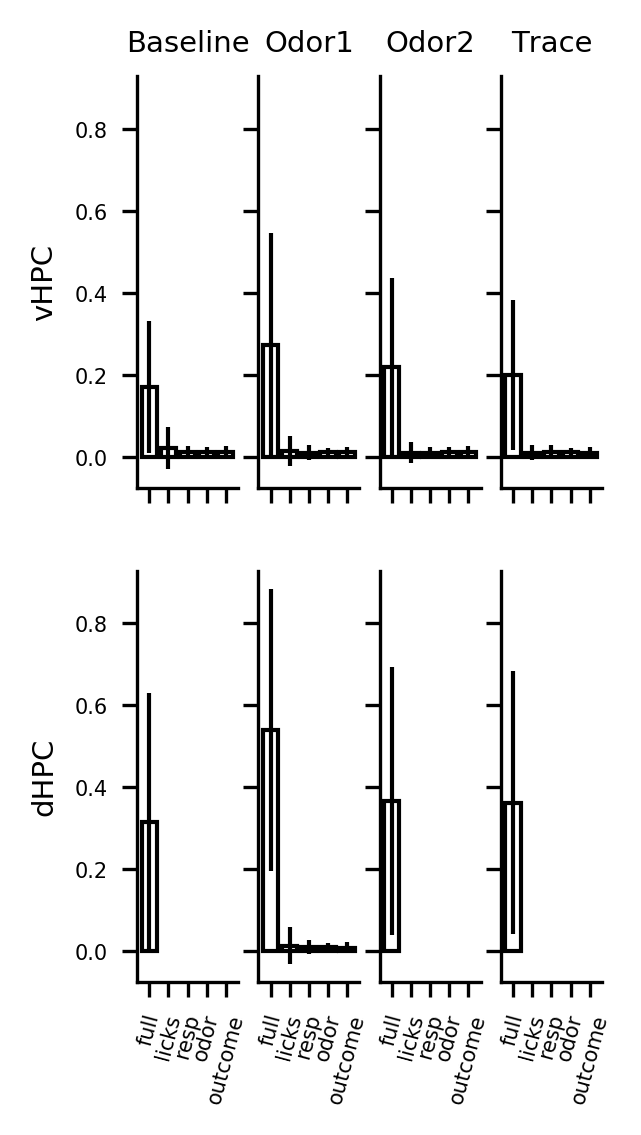

In [441]:
fig, ax = pl.subplots(2, 4, figsize=(2., 4), sharex=True, sharey=True)


a_ax=0
for ani in ani_group:
    b_ax=0
    for bi in bins:
        ax_t=ax[a_ax][b_ax]
        exec("pt.plot_bars(np.r_[%s_%s.T],ax=ax_t)")%(ani,bi)
        b_ax=b_ax+1
    a_ax=a_ax+1
    
ax[0][0].set_title('Baseline')
ax[0][1].set_title('Odor1')
ax[0][2].set_title('Odor2')
ax[0][3].set_title('Trace')
    
ax[0][0].set_ylabel('vHPC')
ax[1][0].set_ylabel('dHPC')
    
for ax_t in ax[-1]:
    ax_t.set_xticks(range(len(partz)))
    ax_t.set_xticklabels(partz, fontsize=5, rotation=75)
    
#ax.set_ylim(-0.5, 1)
#ax.set_xlim(-0.5, 1.5)

#ax.set_xticks(np.arange(2))
#ax.set_xticklabels(['vHPC', 'dHPC'])

#ax.set_ylabel(r'$R^2$')

pvs = []
#pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 1))

stat_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
stat_func(values[0],values[1])

MannwhitneyuResult(statistic=1.0, pvalue=0.013789426131302253)

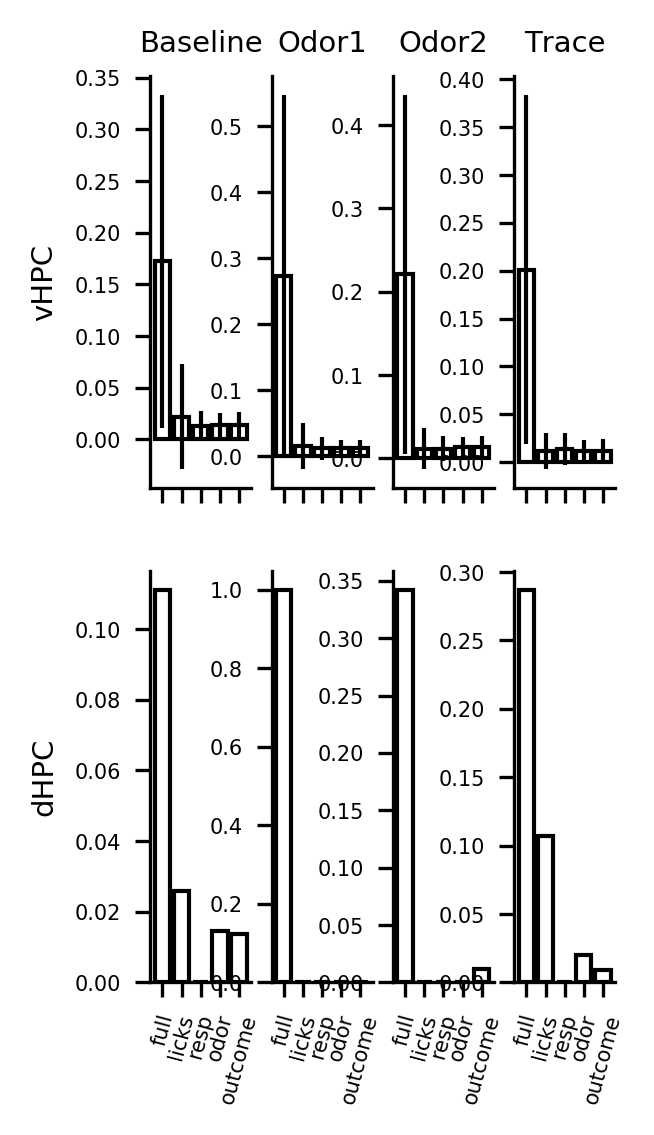

In [434]:
fig, ax = pl.subplots(2, 4, figsize=(2., 4), sharex=True, sharey=False)


a_ax=0
for ani in ani_group:
    b_ax=0
    for bi in bins:
        ax_t=ax[a_ax][b_ax]
        exec("pt.plot_bars(np.r_[%s_%s.T],ax=ax_t)")%(ani,bi)
        b_ax=b_ax+1
    a_ax=a_ax+1
    
ax[0][0].set_title('Baseline')
ax[0][1].set_title('Odor1')
ax[0][2].set_title('Odor2')
ax[0][3].set_title('Trace')
    
ax[0][0].set_ylabel('vHPC')
ax[1][0].set_ylabel('dHPC')
    
for ax_t in ax[-1]:
    ax_t.set_xticks(range(len(partz)))
    ax_t.set_xticklabels(partz, fontsize=5, rotation=75)
    
#ax.set_ylim(-0.5, 1)
#ax.set_xlim(-0.5, 1.5)

#ax.set_xticks(np.arange(2))
#ax.set_xticklabels(['vHPC', 'dHPC'])

#ax.set_ylabel(r'$R^2$')

pvs = []
#pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 1))

stat_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
stat_func(values[0],values[1])

function r2_f_part = r2_cv(x, y, k_folds, var_ind)

% I'm going to have an x and y, x will have 4 columns, y will have 1
% var_ind will tell me how many columns from x are relevant
% will split data 20/80 per 120 trials (which is to say per neuron),
% randomly shuffle the trials within each neuron


r2_f_part = zeros(length(var_ind)+1,1);

y=y.';
cv = cvpartition(numel(y), 'kfold',k_folds);

r2_full = zeros(k_folds,1);
for k=1:k_folds
    % training/testing indices for this fold
    trainIdx = cv.training(k);
    testIdx = cv.test(k);
    
    % train GLM model
    mdl= GeneralizedLinearModel.fit(x(trainIdx,:), y(trainIdx), ...
        'linear', 'Distribution','normal');
    
    % predict regression output
    Y_hat = predict(mdl, x(testIdx,:));
    
    % compute mean squared error
    r2_full(k) = mean((y(testIdx) - Y_hat).^2);
    
   
end
r2_full = mean(r2_full);
r2_full(r2_full<0) = 0;
r2_full(r2_full>1) = 1;
r2_f_part(1) = r2_full;

r2_partial_cv = zeros(k_folds,1);
r2_partials = zeros(length(var_ind),1);
for parts = 1:length(var_ind)
    x_p=x(:,var_ind(parts,:));
    for k=1:k_folds
        % training/testing indices for this fold
        trainIdx = cv.training(k);
        testIdx = cv.test(k);

        % train GLM model
        mdl= GeneralizedLinearModel.fit(x_p(trainIdx,:), y(trainIdx), ...
            'linear', 'Distribution','normal');

        % predict regression output
        Y_hat = predict(mdl, x_p(testIdx,:));

        % compute mean squared error
        r2_partial_cv(k) = mean((y(testIdx) - Y_hat).^2);


    end
    r2_partials(parts) = mean(r2_partial_cv);
    r2_partials(r2_partials<0) = 0;
    r2_partials(r2_partials>1) = 1;
    r2_f_part(1+parts) = r2_part(r2_full,r2_partials(parts));
end

end

%% Format all behavior predictors and firing rate data for that cell into same length
% if using more than 1 timebin, input data is vectorized: 
%   ie/ if lick rate data is 4 bins x 20 trials, vectorize it to be 80 trials
%       x 1 - do the same for all predictors and firing rate


%%

load('y_dhpc_odor1_dict.mat')
load('y_dhpc_odor2_dict.mat')
load('y_dhpc_trace_dict.mat')
load('y_dhpc_baseline_dict.mat')
load('x_vhpc_trace_dict.mat')
load('x_vhpc_odor2_dict.mat')
load('x_vhpc_odor1_dict.mat')
load('x_vhpc_baseline_dict.mat')
load('y_vhpc_baseline_dict.mat')
load('y_vhpc_odor1_dict.mat')
load('y_vhpc_odor2_dict.mat')
load('y_vhpc_trace_dict.mat')
load('x_dhpc_baseline_dict.mat')
load('x_dhpc_odor1_dict.mat')
load('x_dhpc_odor2_dict.mat')
load('x_dhpc_trace_dict.mat')

%%

var_ind=zeros(4,3);
var_ind(1,:) = [2,3,4];
var_ind(2,:) = [1,3,4];
var_ind(3,:) = [1,2,4];
var_ind(4,:) = [1,2,3];

k_folds = 5;

dhpc_ind = (1:length(ev_dhpc_baseline));
sub_ind = randsample(dhpc_ind,length(ev_vhpc_trace));

y_samp_dhpc_baseline = ev_dhpc_baseline(sub_ind);
y_samp_dhpc_odor1 = ev_dhpc_odor1(sub_ind);
y_samp_dhpc_odor2 = ev_dhpc_odor2(sub_ind);
y_samp_dhpc_trace = ev_dhpc_trace(sub_ind);

x_samp_dhpc_baseline = var_dhpc_baseline(sub_ind,:);
x_samp_dhpc_odor1 = var_dhpc_odor1(sub_ind,:);
x_samp_dhpc_odor2 = var_dhpc_odor2(sub_ind,:);
x_samp_dhpc_trace = var_dhpc_trace(sub_ind,:);

vhpc_n = length(ev_vhpc_baseline)/120;
dhpc_n = length(ev_dhpc_baseline)/120;
dhpc_sub_n = length(y_samp_dhpc_baseline)/120;

vhpc_r2_f_diff_baseline = zeros(vhpc_n,5);
dhpc_r2_f_diff_baseline = zeros(dhpc_n,5);
dhpc_samp_r2_f_diff_baseline = zeros(dhpc_sub_n,5);
vhpc_r2_f_diff_odor1 = zeros(vhpc_n,5);
dhpc_r2_f_diff_odor1 = zeros(dhpc_n,5);
dhpc_samp_r2_f_diff_odor1 = zeros(dhpc_sub_n,5);
vhpc_r2_f_diff_odor2 = zeros(vhpc_n,5);
dhpc_r2_f_diff_odor2 = zeros(dhpc_n,5);
dhpc_samp_r2_f_diff_odor2 = zeros(dhpc_sub_n,5);
vhpc_r2_f_diff_trace = zeros(vhpc_n,5);
dhpc_r2_f_diff_trace = zeros(dhpc_n,5);
dhpc_samp_r2_f_diff_trace = zeros(dhpc_sub_n,5);

for i = 1:vhpc_n

    vhpc_r2_f_diff_baseline(i,:) = r2_cv(var_vhpc_baseline((120*(i-1)+1):i*120,:),ev_vhpc_baseline((120*(i-1)+1):i*120),k_folds,var_ind);
    vhpc_r2_f_diff_odor1(i,:) = r2_cv(var_vhpc_odor1((120*(i-1)+1):i*120,:),ev_vhpc_odor1((120*(i-1)+1):i*120),k_folds,var_ind);
    vhpc_r2_f_diff_odor2(i,:) = r2_cv(var_vhpc_odor2((120*(i-1)+1):i*120,:),ev_vhpc_odor2((120*(i-1)+1):i*120),k_folds,var_ind);
    vhpc_r2_f_diff_trace(i,:) = r2_cv(var_vhpc_trace((120*(i-1)+1):i*120,:),ev_vhpc_trace((120*(i-1)+1):i*120),k_folds,var_ind);
    
    dhpc_samp_r2_f_diff_baseline(i,:) = r2_cv(x_samp_dhpc_baseline,y_samp_dhpc_baseline((120*(i-1)+1):i*120),k_folds,var_ind);
    dhpc_samp_r2_f_diff_odor1(i,:) = r2_cv(x_samp_dhpc_odor1((120*(i-1)+1):i*120,:),y_samp_dhpc_odor1((120*(i-1)+1):i*120),k_folds,var_ind);
    dhpc_samp_r2_f_diff_odor2(i,:) = r2_cv(x_samp_dhpc_odor2((120*(i-1)+1):i*120,:),y_samp_dhpc_odor2((120*(i-1)+1):i*120),k_folds,var_ind);
    dhpc_samp_r2_f_diff_trace(i,:) = r2_cv(x_samp_dhpc_trace((120*(i-1)+1):i*120,:),y_samp_dhpc_trace((120*(i-1)+1):i*120),k_folds,var_ind);

end
disp('done with vhpc_n')

for i = 1:dhpc_n
    dhpc_r2_f_diff_baseline(i,:) = r2_cv(var_dhpc_baseline((120*(i-1)+1):i*120,:),ev_dhpc_baseline((120*(i-1)+1):i*120),k_folds,var_ind);
    dhpc_r2_f_diff_odor1(i,:) = r2_cv(var_dhpc_odor1((120*(i-1)+1):i*120,:),ev_dhpc_odor1((120*(i-1)+1):i*120),k_folds,var_ind);
    dhpc_r2_f_diff_odor2(i,:) = r2_cv(var_dhpc_odor2((120*(i-1)+1):i*120,:),ev_dhpc_odor2((120*(i-1)+1):i*120),k_folds,var_ind);
    dhpc_r2_f_diff_trace(i,:) = r2_cv(var_dhpc_trace((120*(i-1)+1):i*120,:),ev_dhpc_trace((120*(i-1)+1):i*120),k_folds,var_ind);
end



In [449]:
save_workspace(db)

Could not store variable 'linear_model'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'random'. Skipping...
Could not store variable 'stat_func'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'pd'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
